In [1]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install wordcloud

Accuracy: 0.9863028953229399

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4698
           1       0.98      0.99      0.99      4282

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



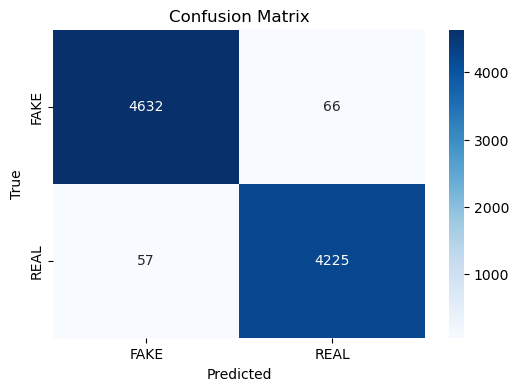

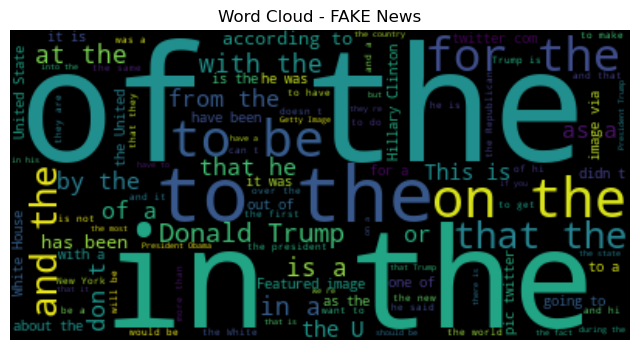

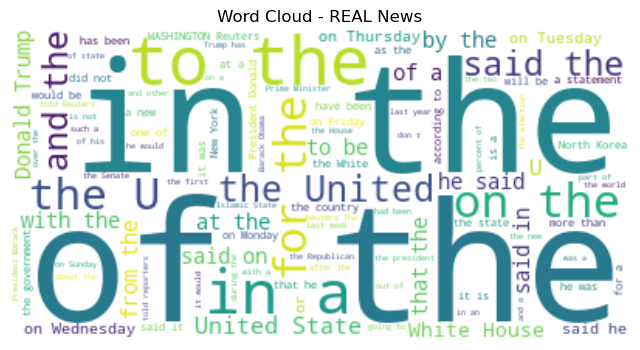

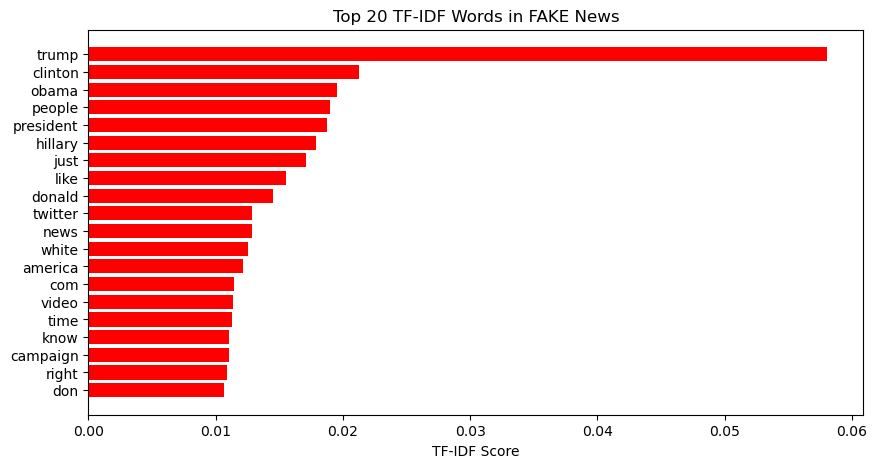

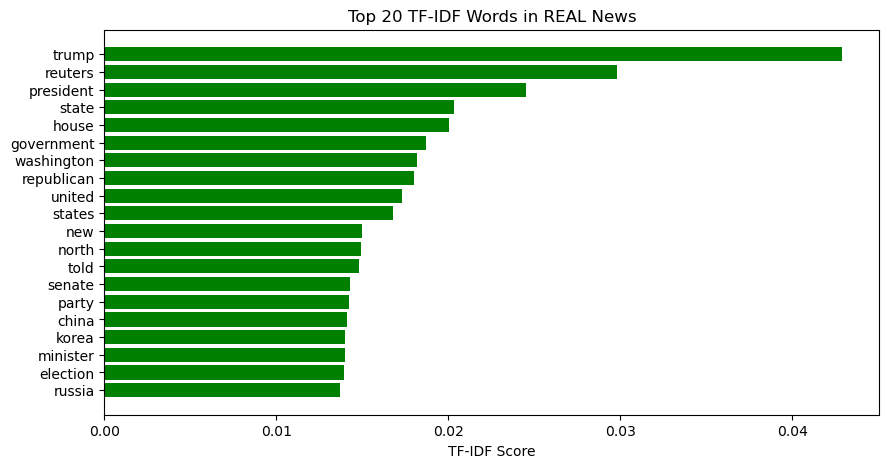

In [1]:
# Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from wordcloud import WordCloud


# Step 2: Load Fake and Real News CSVs
# These files should be in the same directory as your notebook
fake_df = pd.read_csv(r"C:\Users\ss724\Downloads\Fake.csv")
real_df = pd.read_csv(r"C:\Users\ss724\Downloads\True.csv")


# Step 3: Add Labels and Combine

fake_df['label'] = 0  # 0 = FAKE
real_df['label'] = 1  # 1 = REAL

# Use only text and label
df = pd.concat([fake_df[['text', 'label']], real_df[['text', 'label']]], ignore_index=True)
df.dropna(inplace=True)  # Clean missing values
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle


# Step 4: Train-Test Split and TF-IDF

X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# Step 5: Train Logistic Regression Model

model = LogisticRegression()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)


# Step 6: Evaluation

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Step 7: Word Clouds

# Word cloud for FAKE
fake_text = " ".join(df[df['label'] == 0]['text'])
wc_fake = WordCloud(stopwords='english', background_color='black', max_words=100).generate(fake_text)

plt.figure(figsize=(8,6))
plt.imshow(wc_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - FAKE News")
plt.show()

# Word cloud for REAL
real_text = " ".join(df[df['label'] == 1]['text'])
wc_real = WordCloud(stopwords='english', background_color='white', max_words=100).generate(real_text)

plt.figure(figsize=(8,6))
plt.imshow(wc_real, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - REAL News")
plt.show()


# Step 8: Top TF-IDF Terms Bar Charts
feature_names = vectorizer.get_feature_names_out()

# Mean TF-IDF for each word in FAKE and REAL
fake_tfidf = X_train_vec[y_train == 0].mean(axis=0)
real_tfidf = X_train_vec[y_train == 1].mean(axis=0)

fake_scores = np.asarray(fake_tfidf).flatten()
real_scores = np.asarray(real_tfidf).flatten()

# Top 20 words
top_fake_idx = fake_scores.argsort()[-20:][::-1]
top_real_idx = real_scores.argsort()[-20:][::-1]

# Plot FAKE words
plt.figure(figsize=(10,5))
plt.barh([feature_names[i] for i in top_fake_idx], fake_scores[top_fake_idx], color='red')
plt.gca().invert_yaxis()
plt.title("Top 20 TF-IDF Words in FAKE News")
plt.xlabel("TF-IDF Score")
plt.show()

# Plot REAL words
plt.figure(figsize=(10,5))
plt.barh([feature_names[i] for i in top_real_idx], real_scores[top_real_idx], color='green')
plt.gca().invert_yaxis()
plt.title("Top 20 TF-IDF Words in REAL News")
plt.xlabel("TF-IDF Score")
plt.show()
